<a href="https://colab.research.google.com/github/nipun-taneja/fcnn-mnist-analysis/blob/main/FCNN_MNIST_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fully Connected Neural Networks & MNIST — Project Summary

**Purpose:** Showcase practical understanding of fully connected networks (architecture + training behavior) for recruiters.

---

## Part 1 — Architecture Analysis
**Goal:** Understand layer shapes and parameter counts to reason about model size/complexity.

**Methodology (Keras):**
- Define small fully connected nets from given specs (inputs → hidden layers (ReLU) → softmax output).
- For each layer `Dense(n_out)` with `n_in` inputs, compute params: **weights = n_in × n_out**, **biases = n_out**, **total = weights + biases**.
- Tally neurons (by layer) and total learnable parameters.

**Result (What you should observe):**
- Parameter count grows **linearly** with neurons per layer and **multiplicatively** across layers.
- Even small layer-width changes can significantly increase parameters → memory, speed, and overfitting risk.

---

## Part 2 — MNIST Experiment (Single Hidden Layer)
**Goal:** Empirically measure how hidden-layer width affects accuracy/loss.

**Methodology:**
- Train the same MLP on MNIST, varying hidden units: **[1, 5, 10, 20, 50, 100, …]**.
- Run multiple trials; record **average accuracy** and **average loss**.
- Plot **Accuracy vs Neurons** and **Loss vs Neurons**.

**Result (Typical trend):**
- Accuracy improves quickly from very small widths (underfitting) to moderate widths (better capacity).
- **Diminishing returns** beyond a point; very large widths may **overfit** (validation accuracy plateaus or dips, loss behavior unstable).

---

## Why both parts are necessary
- **Part 1 (theory & accounting):** Builds intuition to *predict* compute/memory cost and overfitting risk **before** training.
- **Part 2 (evidence):** Confirms those expectations on real data (MNIST), showing where added capacity stops helping.
- Together, they teach **capacity planning**: choose widths that balance accuracy, generalization, and efficiency.


## Part 1: Architecture Analysis


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
# Define the input layer
input_dim = 3 # Example input dimension, adjust according to your data
inputs = Input(shape=(input_dim,))
# Add hidden layers
x = Dense(4, activation='relu')(inputs)
x = Dense(4, activation='relu')(x)
# Add the output layer
outputs = Dense(2, activation='softmax')(x)
# Create the model
model = Model(inputs=inputs, outputs=outputs)
# Compile the model
model.compile()

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with 3 neurons
inputs = Input(shape=(3,))

# First hidden layer with 5 neurons and ReLU activation
x = Dense(5, activation='relu')(inputs)

# Second hidden layer with 5 neurons and ReLU activation
x = Dense(5, activation='relu')(x)

# Third hidden layer with 5 neurons and ReLU activation
x = Dense(5, activation='relu')(x)

# Output layer with 4 neurons and Softmax activation
outputs = Dense(4, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary (optional)
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            24 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104 (416.00 B)

 Trainable params: 104 (416.00 B)

 Non-trainable params: 0 (0.00 B)

## Part 2: MNIST Experiments


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load and prepare the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data
x_train = x_train.reshape((-1, 784))  # Flatten the images
x_test = x_test.reshape((-1, 784))
y_train = to_categorical(y_train)  # One-hot encode the labels
y_test = to_categorical(y_test)

# Function to create a model with a single hidden layer of variable neurons
def create_model(num_of_neurons):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(784,)))  # Input layer
    model.add(layers.Dense(num_of_neurons, activation='relu'))  # Hidden layer with variable neurons
    model.add(layers.Dense(10, activation='softmax'))  # Output layer
    return model

num_trials = 10
neuron_configurations = [1, 5, 10, 20, 50 ,100]  # Define different neuron configurations
results = np.zeros((len(neuron_configurations), num_trials, 2))  # Store results for each configuration, 10 trials each, 2 metrics (loss, accuracy)

for i, neurons in enumerate(neuron_configurations):
    for trial in range(num_trials):
        model = create_model(neurons)
        model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        model.summary()
        model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)
        results[i, trial] = model.evaluate(x_test, y_test)
        print(f"Trial {trial + 1} for Model with {neurons} Neurons: Accuracy: {results[i, trial, 1]:.4f}, Loss: {results[i, trial, 0]:.4f}")

# Averaging the results
average_results = np.mean(results, axis=1)

for i, avg_result in enumerate(average_results, start=1):
    print(f"Average for Model with {neuron_configurations[i-1]} Neurons: Accuracy: {avg_result[1]:.4f}, Loss: {avg_result[0]:.4f}")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │           785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 805 (3.14 KB)

 Trainable params: 805 (3.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1883 - loss: 2.1203 - val_accuracy: 0.2183 - val_loss: 1.9129
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2303 - loss: 1.9010 - val_accuracy: 0.2403 - val_loss: 1.8414
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2644 - loss: 1.8357 - val_accuracy: 0.2822 - val_loss: 1.7636
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2938 - loss: 1.7624 - val_accuracy: 0.3003 - val_loss: 1.6976
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2991 - loss: 1.7052 - val_accuracy: 0.3053 - val_loss: 1.6550
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3046 - loss: 1.6772 - val_accuracy: 0.3170 - val_loss: 1.6305
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3135 - loss: 1.6469 - val_accuracy: 0.3227 - val_loss: 1.6137
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3134 - loss: 1.6336 - val_accuracy: 0.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │           785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 805 (3.14 KB)

 Trainable params: 805 (3.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1871 - loss: 2.1074 - val_accuracy: 0.2278 - val_loss: 1.8611
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2281 - loss: 1.8576 - val_accuracy: 0.2368 - val_loss: 1.7861
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2449 - loss: 1.7961 - val_accuracy: 0.2450 - val_loss: 1.7529
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2612 - loss: 1.7673 - val_accuracy: 0.2658 - val_loss: 1.7326
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2696 - loss: 1.7520 - val_accuracy: 0.2753 - val_loss: 1.7159
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2824 - loss: 1.7356 - val_accuracy: 0.2847 - val_loss: 1.7057
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2857 - loss: 1.7249 - val_accuracy: 0.2870 - val_loss: 1.6965
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2917 - loss: 1.7185 - val_accuracy: 0.

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │           785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 805 (3.14 KB)

 Trainable params: 805 (3.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1960 - loss: 2.0574 - val_accuracy: 0.2530 - val_loss: 1.8287
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2580 - loss: 1.8312 - val_accuracy: 0.2933 - val_loss: 1.7440
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2922 - loss: 1.7570 - val_accuracy: 0.3057 - val_loss: 1.6995
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3064 - loss: 1.7199 - val_accuracy: 0.3335 - val_loss: 1.6714
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3229 - loss: 1.6932 - val_accuracy: 0.3320 - val_loss: 1.6476
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3356 - loss: 1.6693 - val_accuracy: 0.3455 - val_loss: 1.6285
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3476 - loss: 1.6547 - val_accuracy: 0.3568 - val_loss: 1.6083
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3538 - loss: 1.6387 - val_accuracy: 0.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1)              │           785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 805 (3.14 KB)

 Trainable params: 805 (3.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1671 - loss: 2.1492 - val_accuracy: 0.2368 - val_loss: 1.8966
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2495 - loss: 1.8936 - val_accuracy: 0.2630 - val_loss: 1.8127
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2693 - loss: 1.8289 - val_accuracy: 0.2865 - val_loss: 1.7703
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2883 - loss: 1.7875 - val_accuracy: 0.3002 - val_loss: 1.7431
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2979 - loss: 1.7712 - val_accuracy: 0.3095 - val_loss: 1.7232
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3033 - loss: 1.7556 - val_accuracy: 0.3205 - val_loss: 1.7084
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3130 - loss: 1.7361 - val_accuracy: 0.3327 - val_loss: 1.6928
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3251 - loss: 1.7239 - val_accuracy: 0.

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 1)              │           785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 805 (3.14 KB)

 Trainable params: 805 (3.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1634 - loss: 2.1003 - val_accuracy: 0.2152 - val_loss: 1.8595
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2133 - loss: 1.8567 - val_accuracy: 0.2202 - val_loss: 1.7952
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2229 - loss: 1.8045 - val_accuracy: 0.2440 - val_loss: 1.7632
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2387 - loss: 1.7814 - val_accuracy: 0.2568 - val_loss: 1.7410
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2585 - loss: 1.7640 - val_accuracy: 0.2855 - val_loss: 1.7219
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2771 - loss: 1.7412 - val_accuracy: 0.2923 - val_loss: 1.7114
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2869 - loss: 1.7290 - val_accuracy: 0.3088 - val_loss: 1.7029
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2949 - loss: 1.7189 - val_accuracy: 0.

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 1)              │           785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 805 (3.14 KB)

 Trainable params: 805 (3.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1712 - loss: 2.1064 - val_accuracy: 0.2008 - val_loss: 1.8938
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2128 - loss: 1.8879 - val_accuracy: 0.2698 - val_loss: 1.8035
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2972 - loss: 1.8067 - val_accuracy: 0.3208 - val_loss: 1.7229
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3243 - loss: 1.7376 - val_accuracy: 0.3193 - val_loss: 1.6680
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3303 - loss: 1.6938 - val_accuracy: 0.3317 - val_loss: 1.6307
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3365 - loss: 1.6582 - val_accuracy: 0.3480 - val_loss: 1.6040
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3507 - loss: 1.6309 - val_accuracy: 0.3535 - val_loss: 1.5849
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3542 - loss: 1.6112 - val_accuracy: 0.

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 1)              │           785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 805 (3.14 KB)

 Trainable params: 805 (3.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1633 - loss: 2.1240 - val_accuracy: 0.2007 - val_loss: 1.8974
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2250 - loss: 1.8909 - val_accuracy: 0.2493 - val_loss: 1.7989
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2645 - loss: 1.7927 - val_accuracy: 0.2718 - val_loss: 1.7085
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2754 - loss: 1.7170 - val_accuracy: 0.2795 - val_loss: 1.6640
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2821 - loss: 1.6809 - val_accuracy: 0.2822 - val_loss: 1.6404
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2834 - loss: 1.6619 - val_accuracy: 0.2852 - val_loss: 1.6237
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2885 - loss: 1.6507 - val_accuracy: 0.2808 - val_loss: 1.6198
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3015 - loss: 1.6374 - val_accuracy: 0.

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 1)              │           785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 805 (3.14 KB)

 Trainable params: 805 (3.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1152 - loss: 2.3019 - val_accuracy: 0.1050 - val_loss: 2.3018
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1333 - loss: 2.2554 - val_accuracy: 0.2098 - val_loss: 1.9384
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2304 - loss: 1.9094 - val_accuracy: 0.2303 - val_loss: 1.8385
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2512 - loss: 1.8321 - val_accuracy: 0.2875 - val_loss: 1.7989
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2917 - loss: 1.7950 - val_accuracy: 0.3237 - val_loss: 1.7439
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3098 - loss: 1.7487 - val_accuracy: 0.3203 - val_loss: 1.7177
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3173 - loss: 1.7242 - val_accuracy: 0.3277 - val_loss: 1.7011
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3214 - loss: 1.7140 - val_accuracy: 0.

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 1)              │           785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 805 (3.14 KB)

 Trainable params: 805 (3.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1973 - loss: 2.0880 - val_accuracy: 0.2370 - val_loss: 1.8843
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2330 - loss: 1.8684 - val_accuracy: 0.2573 - val_loss: 1.7987
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2703 - loss: 1.7998 - val_accuracy: 0.3030 - val_loss: 1.7396
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2847 - loss: 1.7423 - val_accuracy: 0.3130 - val_loss: 1.7009
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3105 - loss: 1.7099 - val_accuracy: 0.3248 - val_loss: 1.6724
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3245 - loss: 1.6826 - val_accuracy: 0.3322 - val_loss: 1.6522
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3357 - loss: 1.6644 - val_accuracy: 0.3317 - val_loss: 1.6362
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3376 - loss: 1.6565 - val_accuracy: 0.

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 1)              │           785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 805 (3.14 KB)

 Trainable params: 805 (3.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1594 - loss: 2.0906 - val_accuracy: 0.2178 - val_loss: 1.8862
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2201 - loss: 1.8731 - val_accuracy: 0.2477 - val_loss: 1.8189
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2619 - loss: 1.8178 - val_accuracy: 0.2915 - val_loss: 1.7750
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2944 - loss: 1.7800 - val_accuracy: 0.3307 - val_loss: 1.7315
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3136 - loss: 1.7407 - val_accuracy: 0.3133 - val_loss: 1.6970
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3209 - loss: 1.7075 - val_accuracy: 0.3217 - val_loss: 1.6685
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3311 - loss: 1.6838 - val_accuracy: 0.3338 - val_loss: 1.6554
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3397 - loss: 1.6739 - val_accuracy: 0.

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5477 - loss: 1.3352 - val_accuracy: 0.8520 - val_loss: 0.5243
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8312 - loss: 0.5663 - val_accuracy: 0.8797 - val_loss: 0.4276
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8575 - loss: 0.4954 - val_accuracy: 0.8908 - val_loss: 0.3955
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8691 - loss: 0.4551 - val_accuracy: 0.8943 - val_loss: 0.3802
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8716 - loss: 0.4408 - val_accuracy: 0.8968 - val_loss: 0.3667
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8797 - loss: 0.4333 - val_accuracy: 0.9023 - val_loss: 0.3543
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8808 - loss: 0.4222 - val_accuracy: 0.9003 - val_loss: 0.3497
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8846 - loss: 0.4107 - val_accuracy: 0.

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5407 - loss: 1.3783 - val_accuracy: 0.8610 - val_loss: 0.5065
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8478 - loss: 0.5361 - val_accuracy: 0.8803 - val_loss: 0.4162
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8678 - loss: 0.4641 - val_accuracy: 0.8927 - val_loss: 0.3800
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8760 - loss: 0.4344 - val_accuracy: 0.8977 - val_loss: 0.3620
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8798 - loss: 0.4187 - val_accuracy: 0.8968 - val_loss: 0.3553
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8799 - loss: 0.4115 - val_accuracy: 0.8973 - val_loss: 0.3499
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8822 - loss: 0.4023 - val_accuracy: 0.9025 - val_loss: 0.3395
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8854 - loss: 0.3916 - val_accuracy: 0.

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5144 - loss: 1.4365 - val_accuracy: 0.8575 - val_loss: 0.5194
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8400 - loss: 0.5690 - val_accuracy: 0.8800 - val_loss: 0.4227
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8611 - loss: 0.4897 - val_accuracy: 0.8895 - val_loss: 0.3923
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8704 - loss: 0.4535 - val_accuracy: 0.8933 - val_loss: 0.3763
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8762 - loss: 0.4339 - val_accuracy: 0.8945 - val_loss: 0.3676
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8796 - loss: 0.4209 - val_accuracy: 0.8985 - val_loss: 0.3553
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8816 - loss: 0.4138 - val_accuracy: 0.8978 - val_loss: 0.3546
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8856 - loss: 0.4045 - val_accuracy: 0.

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5710 - loss: 1.3856 - val_accuracy: 0.8433 - val_loss: 0.5431
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8248 - loss: 0.5987 - val_accuracy: 0.8655 - val_loss: 0.4591
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8524 - loss: 0.5130 - val_accuracy: 0.8753 - val_loss: 0.4245
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8605 - loss: 0.4829 - val_accuracy: 0.8815 - val_loss: 0.4074
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8657 - loss: 0.4674 - val_accuracy: 0.8880 - val_loss: 0.3950
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8711 - loss: 0.4464 - val_accuracy: 0.8908 - val_loss: 0.3843
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8703 - loss: 0.4531 - val_accuracy: 0.8912 - val_loss: 0.3819
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8769 - loss: 0.4329 - val_accuracy: 0.

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5374 - loss: 1.4043 - val_accuracy: 0.8610 - val_loss: 0.5199
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8418 - loss: 0.5640 - val_accuracy: 0.8823 - val_loss: 0.4274
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8631 - loss: 0.4938 - val_accuracy: 0.8893 - val_loss: 0.3895
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8719 - loss: 0.4500 - val_accuracy: 0.8963 - val_loss: 0.3718
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8761 - loss: 0.4393 - val_accuracy: 0.8962 - val_loss: 0.3599
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8773 - loss: 0.4293 - val_accuracy: 0.9003 - val_loss: 0.3481
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8858 - loss: 0.4055 - val_accuracy: 0.9043 - val_loss: 0.3410
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8882 - loss: 0.4025 - val_accuracy: 0.

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5269 - loss: 1.3686 - val_accuracy: 0.8722 - val_loss: 0.4536
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8521 - loss: 0.5059 - val_accuracy: 0.8937 - val_loss: 0.3909
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8689 - loss: 0.4462 - val_accuracy: 0.8963 - val_loss: 0.3668
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8773 - loss: 0.4250 - val_accuracy: 0.8995 - val_loss: 0.3483
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8816 - loss: 0.4064 - val_accuracy: 0.9000 - val_loss: 0.3376
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8858 - loss: 0.3907 - val_accuracy: 0.9050 - val_loss: 0.3283
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8891 - loss: 0.3892 - val_accuracy: 0.9087 - val_loss: 0.3247
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8886 - loss: 0.3796 - val_accuracy: 0.

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5073 - loss: 1.4699 - val_accuracy: 0.8433 - val_loss: 0.5664
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8325 - loss: 0.5826 - val_accuracy: 0.8812 - val_loss: 0.4244
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8665 - loss: 0.4720 - val_accuracy: 0.8937 - val_loss: 0.3814
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8761 - loss: 0.4389 - val_accuracy: 0.9012 - val_loss: 0.3558
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8835 - loss: 0.4179 - val_accuracy: 0.9052 - val_loss: 0.3387
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8855 - loss: 0.4085 - val_accuracy: 0.9078 - val_loss: 0.3309
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8887 - loss: 0.3892 - val_accuracy: 0.9060 - val_loss: 0.3234
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8903 - loss: 0.3802 - val_accuracy: 0.

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5159 - loss: 1.4442 - val_accuracy: 0.8462 - val_loss: 0.5587
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8230 - loss: 0.6230 - val_accuracy: 0.8730 - val_loss: 0.4572
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8483 - loss: 0.5418 - val_accuracy: 0.8800 - val_loss: 0.4184
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8652 - loss: 0.4857 - val_accuracy: 0.8892 - val_loss: 0.3877
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8720 - loss: 0.4603 - val_accuracy: 0.8957 - val_loss: 0.3668
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8779 - loss: 0.4389 - val_accuracy: 0.9053 - val_loss: 0.3420
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8845 - loss: 0.4178 - val_accuracy: 0.9078 - val_loss: 0.3281
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8891 - loss: 0.4000 - val_accuracy: 0.

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5361 - loss: 1.4111 - val_accuracy: 0.8538 - val_loss: 0.5378
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8367 - loss: 0.5577 - val_accuracy: 0.8785 - val_loss: 0.4527
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8558 - loss: 0.4980 - val_accuracy: 0.8852 - val_loss: 0.4250
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8634 - loss: 0.4710 - val_accuracy: 0.8913 - val_loss: 0.4047
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8680 - loss: 0.4550 - val_accuracy: 0.8903 - val_loss: 0.3953
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8747 - loss: 0.4433 - val_accuracy: 0.8938 - val_loss: 0.3884
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8747 - loss: 0.4412 - val_accuracy: 0.8963 - val_loss: 0.3763
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8814 - loss: 0.4113 - val_accuracy: 0.

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4646 - loss: 1.5296 - val_accuracy: 0.8567 - val_loss: 0.5063
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8423 - loss: 0.5422 - val_accuracy: 0.8857 - val_loss: 0.4048
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8625 - loss: 0.4768 - val_accuracy: 0.8947 - val_loss: 0.3741
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8755 - loss: 0.4389 - val_accuracy: 0.8987 - val_loss: 0.3563
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8792 - loss: 0.4290 - val_accuracy: 0.9035 - val_loss: 0.3398
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8840 - loss: 0.4144 - val_accuracy: 0.9020 - val_loss: 0.3437
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8872 - loss: 0.4069 - val_accuracy: 0.9060 - val_loss: 0.3339
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8888 - loss: 0.4003 - val_accuracy: 0.

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7013 - loss: 1.0270 - val_accuracy: 0.9227 - val_loss: 0.2769
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9076 - loss: 0.3191 - val_accuracy: 0.9308 - val_loss: 0.2325
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9194 - loss: 0.2803 - val_accuracy: 0.9363 - val_loss: 0.2199
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9255 - loss: 0.2584 - val_accuracy: 0.9375 - val_loss: 0.2085
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9297 - loss: 0.2443 - val_accuracy: 0.9413 - val_loss: 0.2009
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9309 - loss: 0.2355 - val_accuracy: 0.9425 - val_loss: 0.1966
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9337 - loss: 0.2259 - val_accuracy: 0.9448 - val_loss: 0.1946
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9349 - loss: 0.2177 - val_accuracy: 0.

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6418 - loss: 1.1065 - val_accuracy: 0.9160 - val_loss: 0.3031
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9036 - loss: 0.3448 - val_accuracy: 0.9280 - val_loss: 0.2521
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9137 - loss: 0.3040 - val_accuracy: 0.9327 - val_loss: 0.2372
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9220 - loss: 0.2757 - val_accuracy: 0.9347 - val_loss: 0.2271
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9238 - loss: 0.2636 - val_accuracy: 0.9370 - val_loss: 0.2257
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9264 - loss: 0.2560 - val_accuracy: 0.9377 - val_loss: 0.2208
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9283 - loss: 0.2501 - val_accuracy: 0.9387 - val_loss: 0.2201
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9321 - loss: 0.2380 - val_accuracy: 0.

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6474 - loss: 1.1194 - val_accuracy: 0.9178 - val_loss: 0.2968
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9079 - loss: 0.3351 - val_accuracy: 0.9323 - val_loss: 0.2393
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9195 - loss: 0.2870 - val_accuracy: 0.9357 - val_loss: 0.2210
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9262 - loss: 0.2641 - val_accuracy: 0.9383 - val_loss: 0.2103
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9298 - loss: 0.2510 - val_accuracy: 0.9433 - val_loss: 0.2027
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9343 - loss: 0.2322 - val_accuracy: 0.9428 - val_loss: 0.2002
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9350 - loss: 0.2303 - val_accuracy: 0.9430 - val_loss: 0.1950
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9360 - loss: 0.2251 - val_accuracy: 0.

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6643 - loss: 1.1130 - val_accuracy: 0.9235 - val_loss: 0.2876
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9061 - loss: 0.3366 - val_accuracy: 0.9338 - val_loss: 0.2360
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9172 - loss: 0.2945 - val_accuracy: 0.9325 - val_loss: 0.2312
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9252 - loss: 0.2687 - val_accuracy: 0.9410 - val_loss: 0.2157
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9284 - loss: 0.2560 - val_accuracy: 0.9427 - val_loss: 0.2122
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9335 - loss: 0.2454 - val_accuracy: 0.9422 - val_loss: 0.2055
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9321 - loss: 0.2486 - val_accuracy: 0.9450 - val_loss: 0.2050
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9356 - loss: 0.2363 - val_accuracy: 0.

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6964 - loss: 1.0167 - val_accuracy: 0.9217 - val_loss: 0.2903
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9073 - loss: 0.3308 - val_accuracy: 0.9305 - val_loss: 0.2440
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9215 - loss: 0.2820 - val_accuracy: 0.9325 - val_loss: 0.2353
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9198 - loss: 0.2845 - val_accuracy: 0.9365 - val_loss: 0.2261
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9249 - loss: 0.2643 - val_accuracy: 0.9340 - val_loss: 0.2257
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9259 - loss: 0.2643 - val_accuracy: 0.9370 - val_loss: 0.2188
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9312 - loss: 0.2452 - val_accuracy: 0.9373 - val_loss: 0.2215
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9298 - loss: 0.2454 - val_accuracy: 0.

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7221 - loss: 0.9906 - val_accuracy: 0.9195 - val_loss: 0.2975
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9045 - loss: 0.3410 - val_accuracy: 0.9303 - val_loss: 0.2482
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9182 - loss: 0.2891 - val_accuracy: 0.9330 - val_loss: 0.2304
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9236 - loss: 0.2636 - val_accuracy: 0.9390 - val_loss: 0.2216
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9264 - loss: 0.2569 - val_accuracy: 0.9417 - val_loss: 0.2109
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9312 - loss: 0.2435 - val_accuracy: 0.9425 - val_loss: 0.2062
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9339 - loss: 0.2320 - val_accuracy: 0.9437 - val_loss: 0.2047
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9352 - loss: 0.2280 - val_accuracy: 0.

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6754 - loss: 1.0970 - val_accuracy: 0.9203 - val_loss: 0.2853
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9052 - loss: 0.3342 - val_accuracy: 0.9312 - val_loss: 0.2481
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9178 - loss: 0.2893 - val_accuracy: 0.9367 - val_loss: 0.2290
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9213 - loss: 0.2794 - val_accuracy: 0.9383 - val_loss: 0.2211
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9248 - loss: 0.2670 - val_accuracy: 0.9408 - val_loss: 0.2158
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9279 - loss: 0.2554 - val_accuracy: 0.9373 - val_loss: 0.2155
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9333 - loss: 0.2412 - val_accuracy: 0.9408 - val_loss: 0.2070
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9325 - loss: 0.2377 - val_accuracy: 0.

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6496 - loss: 1.1527 - val_accuracy: 0.9192 - val_loss: 0.2979
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9061 - loss: 0.3437 - val_accuracy: 0.9305 - val_loss: 0.2465
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9176 - loss: 0.2975 - val_accuracy: 0.9357 - val_loss: 0.2275
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9219 - loss: 0.2773 - val_accuracy: 0.9353 - val_loss: 0.2255
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9254 - loss: 0.2644 - val_accuracy: 0.9378 - val_loss: 0.2192
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9274 - loss: 0.2591 - val_accuracy: 0.9398 - val_loss: 0.2151
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9288 - loss: 0.2513 - val_accuracy: 0.9382 - val_loss: 0.2206
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9304 - loss: 0.2512 - val_accuracy: 0.

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7062 - loss: 1.0081 - val_accuracy: 0.9175 - val_loss: 0.3008
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9047 - loss: 0.3374 - val_accuracy: 0.9330 - val_loss: 0.2468
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9169 - loss: 0.2938 - val_accuracy: 0.9370 - val_loss: 0.2360
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9210 - loss: 0.2819 - val_accuracy: 0.9365 - val_loss: 0.2309
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9246 - loss: 0.2681 - val_accuracy: 0.9383 - val_loss: 0.2239
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9265 - loss: 0.2646 - val_accuracy: 0.9388 - val_loss: 0.2226
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9276 - loss: 0.2583 - val_accuracy: 0.9407 - val_loss: 0.2207
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9304 - loss: 0.2488 - val_accuracy: 0.

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6657 - loss: 1.0749 - val_accuracy: 0.9227 - val_loss: 0.2824
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9078 - loss: 0.3273 - val_accuracy: 0.9322 - val_loss: 0.2443
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9175 - loss: 0.2909 - val_accuracy: 0.9363 - val_loss: 0.2244
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9229 - loss: 0.2691 - val_accuracy: 0.9383 - val_loss: 0.2190
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9281 - loss: 0.2581 - val_accuracy: 0.9378 - val_loss: 0.2127
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9316 - loss: 0.2424 - val_accuracy: 0.9402 - val_loss: 0.2051
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9307 - loss: 0.2447 - val_accuracy: 0.9417 - val_loss: 0.2060
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9346 - loss: 0.2301 - val_accuracy: 0.

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7615 - loss: 0.8419 - val_accuracy: 0.9340 - val_loss: 0.2346
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9239 - loss: 0.2717 - val_accuracy: 0.9467 - val_loss: 0.1967
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9377 - loss: 0.2201 - val_accuracy: 0.9515 - val_loss: 0.1767
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9455 - loss: 0.1958 - val_accuracy: 0.9555 - val_loss: 0.1611
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9500 - loss: 0.1747 - val_accuracy: 0.9545 - val_loss: 0.1669
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9530 - loss: 0.1636 - val_accuracy: 0.9565 - val_loss: 0.1531
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9578 - loss: 0.1468 - val_accuracy: 0.9600 - val_loss: 0.1499
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9588 - loss: 0.1428 - val_accuracy: 0.

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_64 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7696 - loss: 0.8366 - val_accuracy: 0.9365 - val_loss: 0.2357
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9231 - loss: 0.2722 - val_accuracy: 0.9475 - val_loss: 0.1921
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9361 - loss: 0.2236 - val_accuracy: 0.9492 - val_loss: 0.1825
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9444 - loss: 0.1976 - val_accuracy: 0.9522 - val_loss: 0.1681
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9476 - loss: 0.1821 - val_accuracy: 0.9515 - val_loss: 0.1632
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9542 - loss: 0.1631 - val_accuracy: 0.9595 - val_loss: 0.1477
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9551 - loss: 0.1537 - val_accuracy: 0.9572 - val_loss: 0.1481
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9598 - loss: 0.1386 - val_accuracy: 0.

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7681 - loss: 0.8294 - val_accuracy: 0.9357 - val_loss: 0.2344
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9230 - loss: 0.2740 - val_accuracy: 0.9470 - val_loss: 0.1942
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9327 - loss: 0.2330 - val_accuracy: 0.9513 - val_loss: 0.1767
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9431 - loss: 0.2002 - val_accuracy: 0.9578 - val_loss: 0.1612
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9471 - loss: 0.1814 - val_accuracy: 0.9588 - val_loss: 0.1610
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9526 - loss: 0.1642 - val_accuracy: 0.9608 - val_loss: 0.1519
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9546 - loss: 0.1597 - val_accuracy: 0.9618 - val_loss: 0.1487
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9579 - loss: 0.1477 - val_accuracy: 0.

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7669 - loss: 0.8363 - val_accuracy: 0.9298 - val_loss: 0.2512
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9153 - loss: 0.2949 - val_accuracy: 0.9383 - val_loss: 0.2201
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9296 - loss: 0.2487 - val_accuracy: 0.9482 - val_loss: 0.1902
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9385 - loss: 0.2190 - val_accuracy: 0.9498 - val_loss: 0.1749
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9443 - loss: 0.2027 - val_accuracy: 0.9527 - val_loss: 0.1675
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9483 - loss: 0.1831 - val_accuracy: 0.9565 - val_loss: 0.1553
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9520 - loss: 0.1707 - val_accuracy: 0.9587 - val_loss: 0.1514
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9548 - loss: 0.1554 - val_accuracy: 0.

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_70 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7800 - loss: 0.7954 - val_accuracy: 0.9375 - val_loss: 0.2297
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9238 - loss: 0.2724 - val_accuracy: 0.9478 - val_loss: 0.1913
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9346 - loss: 0.2267 - val_accuracy: 0.9545 - val_loss: 0.1711
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9441 - loss: 0.1993 - val_accuracy: 0.9570 - val_loss: 0.1589
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9495 - loss: 0.1790 - val_accuracy: 0.9557 - val_loss: 0.1577
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9527 - loss: 0.1672 - val_accuracy: 0.9588 - val_loss: 0.1486
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9553 - loss: 0.1554 - val_accuracy: 0.9582 - val_loss: 0.1477
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9562 - loss: 0.1500 - val_accuracy: 0.

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7718 - loss: 0.8166 - val_accuracy: 0.9397 - val_loss: 0.2301
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9248 - loss: 0.2675 - val_accuracy: 0.9487 - val_loss: 0.1913
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9329 - loss: 0.2310 - val_accuracy: 0.9520 - val_loss: 0.1780
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9385 - loss: 0.2081 - val_accuracy: 0.9530 - val_loss: 0.1759
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9452 - loss: 0.1948 - val_accuracy: 0.9547 - val_loss: 0.1692
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9488 - loss: 0.1783 - val_accuracy: 0.9585 - val_loss: 0.1592
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9519 - loss: 0.1656 - val_accuracy: 0.9582 - val_loss: 0.1580
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9549 - loss: 0.1559 - val_accuracy: 0.

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_74 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7559 - loss: 0.8594 - val_accuracy: 0.9342 - val_loss: 0.2347
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9201 - loss: 0.2818 - val_accuracy: 0.9435 - val_loss: 0.2046
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9318 - loss: 0.2340 - val_accuracy: 0.9497 - val_loss: 0.1779
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9417 - loss: 0.2022 - val_accuracy: 0.9535 - val_loss: 0.1638
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9465 - loss: 0.1848 - val_accuracy: 0.9575 - val_loss: 0.1482
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9516 - loss: 0.1655 - val_accuracy: 0.9603 - val_loss: 0.1438
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9531 - loss: 0.1581 - val_accuracy: 0.9597 - val_loss: 0.1413
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9556 - loss: 0.1526 - val_accuracy: 0.

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_76 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7689 - loss: 0.8231 - val_accuracy: 0.9315 - val_loss: 0.2490
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9160 - loss: 0.2935 - val_accuracy: 0.9402 - val_loss: 0.2136
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9282 - loss: 0.2489 - val_accuracy: 0.9442 - val_loss: 0.1988
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9389 - loss: 0.2193 - val_accuracy: 0.9523 - val_loss: 0.1763
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9424 - loss: 0.2017 - val_accuracy: 0.9583 - val_loss: 0.1661
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9478 - loss: 0.1848 - val_accuracy: 0.9598 - val_loss: 0.1558
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9528 - loss: 0.1643 - val_accuracy: 0.9553 - val_loss: 0.1582
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9547 - loss: 0.1561 - val_accuracy: 0.

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7423 - loss: 0.9104 - val_accuracy: 0.9323 - val_loss: 0.2386
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9223 - loss: 0.2736 - val_accuracy: 0.9438 - val_loss: 0.1951
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9321 - loss: 0.2293 - val_accuracy: 0.9507 - val_loss: 0.1742
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9421 - loss: 0.1994 - val_accuracy: 0.9542 - val_loss: 0.1583
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9473 - loss: 0.1795 - val_accuracy: 0.9592 - val_loss: 0.1480
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9511 - loss: 0.1653 - val_accuracy: 0.9593 - val_loss: 0.1442
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9559 - loss: 0.1528 - val_accuracy: 0.9618 - val_loss: 0.1382
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9588 - loss: 0.1394 - val_accuracy: 0.

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_80 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7764 - loss: 0.8195 - val_accuracy: 0.9363 - val_loss: 0.2351
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9241 - loss: 0.2686 - val_accuracy: 0.9493 - val_loss: 0.1900
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9367 - loss: 0.2234 - val_accuracy: 0.9532 - val_loss: 0.1705
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9413 - loss: 0.2028 - val_accuracy: 0.9580 - val_loss: 0.1559
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9470 - loss: 0.1832 - val_accuracy: 0.9572 - val_loss: 0.1568
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9524 - loss: 0.1651 - val_accuracy: 0.9607 - val_loss: 0.1433
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9543 - loss: 0.1568 - val_accuracy: 0.9608 - val_loss: 0.1447
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9569 - loss: 0.1461 - val_accuracy: 0.

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_82 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8199 - loss: 0.6502 - val_accuracy: 0.9498 - val_loss: 0.1815
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9419 - loss: 0.2058 - val_accuracy: 0.9628 - val_loss: 0.1347
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9561 - loss: 0.1526 - val_accuracy: 0.9665 - val_loss: 0.1192
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9648 - loss: 0.1182 - val_accuracy: 0.9717 - val_loss: 0.1032
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9712 - loss: 0.0973 - val_accuracy: 0.9720 - val_loss: 0.0972
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9744 - loss: 0.0872 - val_accuracy: 0.9743 - val_loss: 0.0926
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9782 - loss: 0.0741 - val_accuracy: 0.9755 - val_loss: 0.0849
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9811 - loss: 0.0664 - val_accuracy: 0.

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8108 - loss: 0.6610 - val_accuracy: 0.9483 - val_loss: 0.1934
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9384 - loss: 0.2187 - val_accuracy: 0.9622 - val_loss: 0.1458
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9543 - loss: 0.1597 - val_accuracy: 0.9670 - val_loss: 0.1207
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9616 - loss: 0.1293 - val_accuracy: 0.9682 - val_loss: 0.1092
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9698 - loss: 0.1059 - val_accuracy: 0.9713 - val_loss: 0.0998
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9751 - loss: 0.0862 - val_accuracy: 0.9710 - val_loss: 0.0941
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9784 - loss: 0.0762 - val_accuracy: 0.9728 - val_loss: 0.0961
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9792 - loss: 0.0695 - val_accuracy: 0.

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_86 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8179 - loss: 0.6568 - val_accuracy: 0.9487 - val_loss: 0.1902
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9399 - loss: 0.2140 - val_accuracy: 0.9607 - val_loss: 0.1511
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9530 - loss: 0.1647 - val_accuracy: 0.9637 - val_loss: 0.1304
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9632 - loss: 0.1294 - val_accuracy: 0.9675 - val_loss: 0.1134
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9694 - loss: 0.1073 - val_accuracy: 0.9693 - val_loss: 0.1064
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9735 - loss: 0.0895 - val_accuracy: 0.9690 - val_loss: 0.1043
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9766 - loss: 0.0776 - val_accuracy: 0.9717 - val_loss: 0.1002
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9808 - loss: 0.0660 - val_accuracy: 0.

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_88 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8076 - loss: 0.6815 - val_accuracy: 0.9468 - val_loss: 0.1944
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9383 - loss: 0.2124 - val_accuracy: 0.9595 - val_loss: 0.1458
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9528 - loss: 0.1629 - val_accuracy: 0.9630 - val_loss: 0.1330
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9631 - loss: 0.1272 - val_accuracy: 0.9687 - val_loss: 0.1137
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9703 - loss: 0.1030 - val_accuracy: 0.9680 - val_loss: 0.1118
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9729 - loss: 0.0960 - val_accuracy: 0.9733 - val_loss: 0.0995
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9768 - loss: 0.0786 - val_accuracy: 0.9725 - val_loss: 0.0993
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9798 - loss: 0.0718 - val_accuracy: 0.

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_90 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8120 - loss: 0.6820 - val_accuracy: 0.9495 - val_loss: 0.1857
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9377 - loss: 0.2116 - val_accuracy: 0.9608 - val_loss: 0.1394
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9555 - loss: 0.1564 - val_accuracy: 0.9668 - val_loss: 0.1131
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9668 - loss: 0.1158 - val_accuracy: 0.9703 - val_loss: 0.1016
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9706 - loss: 0.0995 - val_accuracy: 0.9718 - val_loss: 0.1016
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9731 - loss: 0.0899 - val_accuracy: 0.9727 - val_loss: 0.0954
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9789 - loss: 0.0723 - val_accuracy: 0.9742 - val_loss: 0.0933
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9807 - loss: 0.0658 - val_accuracy: 0.

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_92 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8194 - loss: 0.6587 - val_accuracy: 0.9498 - val_loss: 0.1888
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9396 - loss: 0.2122 - val_accuracy: 0.9615 - val_loss: 0.1435
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9538 - loss: 0.1597 - val_accuracy: 0.9650 - val_loss: 0.1233
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9620 - loss: 0.1324 - val_accuracy: 0.9680 - val_loss: 0.1085
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9687 - loss: 0.1070 - val_accuracy: 0.9697 - val_loss: 0.1012
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9725 - loss: 0.0940 - val_accuracy: 0.9738 - val_loss: 0.0941
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9776 - loss: 0.0785 - val_accuracy: 0.9713 - val_loss: 0.0981
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9799 - loss: 0.0697 - val_accuracy: 0.

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_94 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8167 - loss: 0.6546 - val_accuracy: 0.9448 - val_loss: 0.1926
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9376 - loss: 0.2131 - val_accuracy: 0.9607 - val_loss: 0.1430
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9552 - loss: 0.1566 - val_accuracy: 0.9655 - val_loss: 0.1164
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9638 - loss: 0.1207 - val_accuracy: 0.9680 - val_loss: 0.1051
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9716 - loss: 0.1021 - val_accuracy: 0.9687 - val_loss: 0.1008
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9762 - loss: 0.0837 - val_accuracy: 0.9733 - val_loss: 0.0951
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9774 - loss: 0.0750 - val_accuracy: 0.9730 - val_loss: 0.0906
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9815 - loss: 0.0632 - val_accuracy: 0.

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8180 - loss: 0.6603 - val_accuracy: 0.9507 - val_loss: 0.1844
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9414 - loss: 0.2030 - val_accuracy: 0.9627 - val_loss: 0.1414
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9545 - loss: 0.1568 - val_accuracy: 0.9658 - val_loss: 0.1223
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9628 - loss: 0.1268 - val_accuracy: 0.9673 - val_loss: 0.1120
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9702 - loss: 0.1037 - val_accuracy: 0.9690 - val_loss: 0.1062
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9728 - loss: 0.0929 - val_accuracy: 0.9708 - val_loss: 0.0958
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9765 - loss: 0.0807 - val_accuracy: 0.9712 - val_loss: 0.0968
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9797 - loss: 0.0686 - val_accuracy: 0.

Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_98 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8142 - loss: 0.6651 - val_accuracy: 0.9448 - val_loss: 0.1995
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9361 - loss: 0.2219 - val_accuracy: 0.9583 - val_loss: 0.1533
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9515 - loss: 0.1693 - val_accuracy: 0.9633 - val_loss: 0.1334
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9593 - loss: 0.1390 - val_accuracy: 0.9658 - val_loss: 0.1249
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9678 - loss: 0.1161 - val_accuracy: 0.9712 - val_loss: 0.1068
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9714 - loss: 0.0963 - val_accuracy: 0.9707 - val_loss: 0.1023
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9759 - loss: 0.0825 - val_accuracy: 0.9715 - val_loss: 0.0999
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9766 - loss: 0.0787 - val_accuracy: 0.

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_100 (Dense)               │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8176 - loss: 0.6473 - val_accuracy: 0.9470 - val_loss: 0.1977
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9380 - loss: 0.2226 - val_accuracy: 0.9610 - val_loss: 0.1487
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9536 - loss: 0.1595 - val_accuracy: 0.9655 - val_loss: 0.1259
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9638 - loss: 0.1269 - val_accuracy: 0.9672 - val_loss: 0.1152
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9677 - loss: 0.1077 - val_accuracy: 0.9673 - val_loss: 0.1090
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9740 - loss: 0.0905 - val_accuracy: 0.9727 - val_loss: 0.0984
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9771 - loss: 0.0791 - val_accuracy: 0.9750 - val_loss: 0.0954
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9793 - loss: 0.0689 - val_accuracy: 0.

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_102 (Dense)               │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8457 - loss: 0.5586 - val_accuracy: 0.9585 - val_loss: 0.1565
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9503 - loss: 0.1741 - val_accuracy: 0.9675 - val_loss: 0.1205
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9674 - loss: 0.1132 - val_accuracy: 0.9710 - val_loss: 0.1052
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9747 - loss: 0.0868 - val_accuracy: 0.9727 - val_loss: 0.0929
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9807 - loss: 0.0683 - val_accuracy: 0.9775 - val_loss: 0.0844
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9836 - loss: 0.0561 - val_accuracy: 0.9780 - val_loss: 0.0796
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9872 - loss: 0.0452 - val_accuracy: 0.9785 - val_loss: 0.0782
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9889 - loss: 0.0379 - val_accuracy: 0.

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_104 (Dense)               │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8508 - loss: 0.5421 - val_accuracy: 0.9573 - val_loss: 0.1514
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9529 - loss: 0.1614 - val_accuracy: 0.9688 - val_loss: 0.1097
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9682 - loss: 0.1088 - val_accuracy: 0.9698 - val_loss: 0.0975
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9768 - loss: 0.0833 - val_accuracy: 0.9763 - val_loss: 0.0856
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9808 - loss: 0.0633 - val_accuracy: 0.9797 - val_loss: 0.0751
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9854 - loss: 0.0505 - val_accuracy: 0.9785 - val_loss: 0.0773
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9887 - loss: 0.0425 - val_accuracy: 0.9787 - val_loss: 0.0727
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9905 - loss: 0.0337 - val_accuracy: 0.

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_106 (Dense)               │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8351 - loss: 0.5826 - val_accuracy: 0.9558 - val_loss: 0.1599
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9521 - loss: 0.1719 - val_accuracy: 0.9688 - val_loss: 0.1191
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9656 - loss: 0.1192 - val_accuracy: 0.9707 - val_loss: 0.1107
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9736 - loss: 0.0898 - val_accuracy: 0.9735 - val_loss: 0.0940
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9794 - loss: 0.0687 - val_accuracy: 0.9762 - val_loss: 0.0897
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9825 - loss: 0.0602 - val_accuracy: 0.9773 - val_loss: 0.0797
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9870 - loss: 0.0461 - val_accuracy: 0.9797 - val_loss: 0.0768
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9890 - loss: 0.0396 - val_accuracy: 0.

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_108 (Dense)               │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8478 - loss: 0.5528 - val_accuracy: 0.9568 - val_loss: 0.1585
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9521 - loss: 0.1673 - val_accuracy: 0.9700 - val_loss: 0.1113
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9666 - loss: 0.1158 - val_accuracy: 0.9712 - val_loss: 0.1007
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9753 - loss: 0.0848 - val_accuracy: 0.9715 - val_loss: 0.0999
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9803 - loss: 0.0681 - val_accuracy: 0.9750 - val_loss: 0.0896
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9841 - loss: 0.0549 - val_accuracy: 0.9775 - val_loss: 0.0823
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9871 - loss: 0.0461 - val_accuracy: 0.9780 - val_loss: 0.0827
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9902 - loss: 0.0357 - val_accuracy: 0.

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_110 (Dense)               │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8466 - loss: 0.5525 - val_accuracy: 0.9602 - val_loss: 0.1518
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9518 - loss: 0.1682 - val_accuracy: 0.9695 - val_loss: 0.1065
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9691 - loss: 0.1120 - val_accuracy: 0.9735 - val_loss: 0.0939
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9750 - loss: 0.0840 - val_accuracy: 0.9740 - val_loss: 0.0887
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9808 - loss: 0.0675 - val_accuracy: 0.9758 - val_loss: 0.0842
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9853 - loss: 0.0522 - val_accuracy: 0.9770 - val_loss: 0.0824
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9869 - loss: 0.0448 - val_accuracy: 0.9788 - val_loss: 0.0789
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9900 - loss: 0.0367 - val_accuracy: 0.

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_112 (Dense)               │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8469 - loss: 0.5553 - val_accuracy: 0.9583 - val_loss: 0.1499
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9517 - loss: 0.1655 - val_accuracy: 0.9682 - val_loss: 0.1142
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9658 - loss: 0.1177 - val_accuracy: 0.9713 - val_loss: 0.0996
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9737 - loss: 0.0900 - val_accuracy: 0.9758 - val_loss: 0.0884
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9794 - loss: 0.0710 - val_accuracy: 0.9760 - val_loss: 0.0849
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9828 - loss: 0.0568 - val_accuracy: 0.9762 - val_loss: 0.0817
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9858 - loss: 0.0451 - val_accuracy: 0.9775 - val_loss: 0.0889
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9886 - loss: 0.0404 - val_accuracy: 0.

Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_114 (Dense)               │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8455 - loss: 0.5652 - val_accuracy: 0.9593 - val_loss: 0.1471
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9529 - loss: 0.1619 - val_accuracy: 0.9682 - val_loss: 0.1148
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9681 - loss: 0.1129 - val_accuracy: 0.9713 - val_loss: 0.0954
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9754 - loss: 0.0863 - val_accuracy: 0.9737 - val_loss: 0.0876
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9798 - loss: 0.0676 - val_accuracy: 0.9757 - val_loss: 0.0814
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9836 - loss: 0.0547 - val_accuracy: 0.9770 - val_loss: 0.0819
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9877 - loss: 0.0434 - val_accuracy: 0.9733 - val_loss: 0.0875
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9892 - loss: 0.0379 - val_accuracy: 0.

Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_116 (Dense)               │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8492 - loss: 0.5532 - val_accuracy: 0.9563 - val_loss: 0.1578
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9529 - loss: 0.1606 - val_accuracy: 0.9633 - val_loss: 0.1194
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9649 - loss: 0.1182 - val_accuracy: 0.9728 - val_loss: 0.0963
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9752 - loss: 0.0870 - val_accuracy: 0.9737 - val_loss: 0.0905
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9809 - loss: 0.0666 - val_accuracy: 0.9767 - val_loss: 0.0829
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9841 - loss: 0.0547 - val_accuracy: 0.9758 - val_loss: 0.0803
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9873 - loss: 0.0452 - val_accuracy: 0.9762 - val_loss: 0.0807
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9886 - loss: 0.0392 - val_accuracy: 0.

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_118 (Dense)               │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8396 - loss: 0.5710 - val_accuracy: 0.9607 - val_loss: 0.1546
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9513 - loss: 0.1702 - val_accuracy: 0.9667 - val_loss: 0.1231
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9664 - loss: 0.1193 - val_accuracy: 0.9718 - val_loss: 0.1001
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9744 - loss: 0.0869 - val_accuracy: 0.9763 - val_loss: 0.0869
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9812 - loss: 0.0675 - val_accuracy: 0.9752 - val_loss: 0.0856
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9827 - loss: 0.0571 - val_accuracy: 0.9740 - val_loss: 0.0904
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9871 - loss: 0.0444 - val_accuracy: 0.9797 - val_loss: 0.0770
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9890 - loss: 0.0371 - val_accuracy: 0.

Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_120 (Dense)               │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8456 - loss: 0.5571 - val_accuracy: 0.9587 - val_loss: 0.1599
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9499 - loss: 0.1752 - val_accuracy: 0.9682 - val_loss: 0.1134
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9662 - loss: 0.1177 - val_accuracy: 0.9705 - val_loss: 0.0982
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9749 - loss: 0.0879 - val_accuracy: 0.9752 - val_loss: 0.0856
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9810 - loss: 0.0652 - val_accuracy: 0.9752 - val_loss: 0.0838
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9827 - loss: 0.0566 - val_accuracy: 0.9758 - val_loss: 0.0796
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9870 - loss: 0.0449 - val_accuracy: 0.9767 - val_loss: 0.0810
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9896 - loss: 0.0368 - val_accuracy: 0.

Text(0.5, 0, 'Number of Neurons')

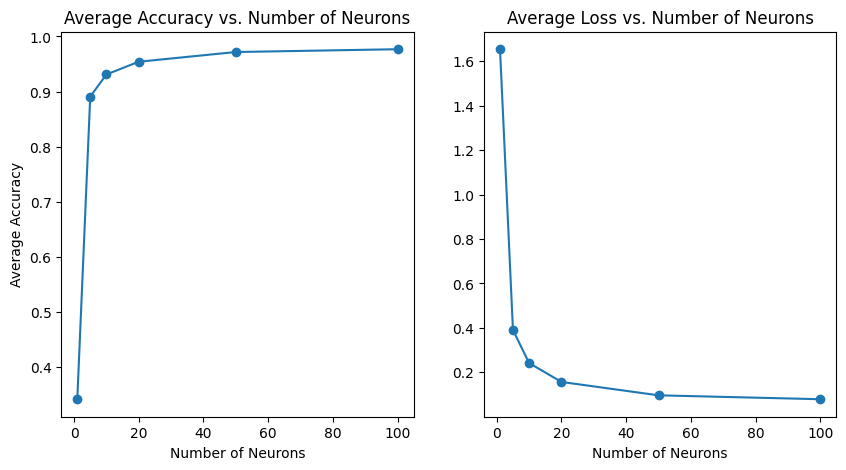

In [ ]:
import matplotlib.pyplot as plt
# Extract accuracy and loss values for plotting
accuracies = [avg[1] for avg in average_results]
losses = [avg[0] for avg in average_results]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(neuron_configurations, accuracies, marker='o')
plt.title('Average Accuracy vs. Number of Neurons')
plt.xlabel('Number of Neurons')
plt.ylabel('Average Accuracy')
plt.subplot(1, 2, 2)
plt.plot(neuron_configurations, losses, marker='o')
plt.title('Average Loss vs. Number of Neurons')
plt.xlabel('Number of Neurons')


As the number of neurons in the hidden layer increased from 1 to 50, the average accuracy improved significantly, and the loss decreased sharply. This indicates that the model gained better representational power, allowing it to learn and generalize patterns in the MNIST dataset more effectively.

🔹 Patterns of Improvement and Diminishing Returns
The most substantial gains in both accuracy and loss were observed when increasing neurons from 1 to 20, and then to 50.

Beyond 50 neurons, specifically around 60 and above, the accuracy plateaued, and further additions led to only marginal improvements.

Similarly, loss decreased rapidly at first, but also flattened out after 60 neurons, showing diminishing benefits with more complexity.

This suggests a point of diminishing returns: while increasing neurons initially helps, after a certain threshold, the benefits taper off.

🔹 Potential Reasons for the Observed Trends
Underfitting at Lower Neuron Counts (1–10):
At very low neuron configurations, the model lacks sufficient capacity to capture the complex features of handwritten digits. This leads to underfitting — poor performance on both training and test data.

Optimal Learning Around 20–50 Neurons:
These configurations offer a good balance between model complexity and generalization. The model has enough parameters to learn meaningful features without being overly complex.

Overfitting Risk or Diminishing Returns Beyond 60 Neurons:
Adding more neurons increases model capacity but can lead to overfitting, especially if not accompanied by regularization or early stopping. However, in this case, the plateau indicates not strong overfitting, but rather saturation in learning capability — the model is already capturing most of the useful patterns.

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with 3 neurons
inputs = Input(shape=(3,))

# First hidden layer with 5 neurons and ReLU activation
x = Dense(5, activation='relu')(inputs)

# Second hidden layer with 5 neurons and ReLU activation
x = Dense(5, activation='relu')(x)

# Third hidden layer with 5 neurons and ReLU activation
x = Dense(5, activation='relu')(x)

# Output layer with 4 neurons and Softmax activation
outputs = Dense(4, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary (optional)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            24 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104 (416.00 B)

 Trainable params: 104 (416.00 B)

 Non-trainable params: 0 (0.00 B)

## Key Findings

- Logistic Regression–like probabilistic models handle noisy labels better than Perceptron-style linear classifiers.  
- On MNIST, **increasing hidden neurons improves accuracy and reduces loss**, but gains diminish after ~50 neurons.  
- Overly large hidden layers risk **overfitting** and don’t guarantee better generalization.  
- Practical lesson: **balance model complexity with data size and noise level**.

---
